#Question 1: Occupations


In [35]:
#Step 1. Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

# Step 3: Load dataset into a variable `users`
users = pd.read_csv(url, sep='|')
users.head()


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [37]:
#Step 4: Mean age per occupation
# Calculate mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [38]:
#Step 5: Male ratio per occupation (sorted descending)
# Calculate Male ratio per occupation
users['is_male'] = users['gender'] == 'M'
male_ratio = users.groupby('occupation')['is_male'].mean().sort_values(ascending=False)
print(male_ratio)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: is_male, dtype: float64


In [39]:
#Step 6: Minimum and maximum ages per occupation
# Minimum and maximum ages per occupation
age_min_max = users.groupby('occupation')['age'].agg(['min', 'max'])
print(age_min_max)


               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [40]:
#Step 7: Mean age per occupation and gender
# Mean age per occupation and gender
mean_age_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_occupation_gender)


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [41]:
#Step 8: Percentage of men and women per occupation
# Percentage of men and women per occupation
gender_counts = users.groupby('occupation')['gender'].value_counts(normalize=True).unstack()
print(gender_counts * 100)


gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor               NaN  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


#Question 2: Euro Teams

In [42]:
#Step 1: Import Necessary Libraries
import pandas as pd


In [43]:
#Step 2: Load the Dataset
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)
euro12.head()


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [44]:
#Step 3: Select Only the Goals Column
goals = euro12['Goals']
print(goals)


0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [45]:
#Step 4: Number of Teams Participated
teams_participated = euro12['Team'].nunique()
print(teams_participated)


16


In [46]:
#Step 5: Number of Columns in the Dataset
num_columns = euro12.shape[1]
print(num_columns)


35


In [47]:
#Step 6: Select Specific Columns
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)


                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [48]:
#Step 7: Sort Teams by Red Cards and Then by Yellow Cards
sorted_discipline = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[True, True])
print(sorted_discipline)


                   Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12               Russia             6          0
1        Czech Republic             7          0
14               Sweden             7          0
0               Croatia             9          0
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
11  Republic of Ireland             6          1
9                Poland             7          1
6                Greece             9          1


In [49]:
#Step 8: Mean Yellow Cards Per Team
mean_yellow_cards = euro12['Yellow Cards'].mean()
print(mean_yellow_cards)


7.4375


In [50]:
#Step 9: Filter Teams That Scored More Than 6 Goals
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
print(teams_more_than_6_goals)


       Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33             55.9%   

   % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5             15.6%                          80             2              1   
13            16.0%                         100             0              1   

    Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                      0  ...          10                 62.6%         63   
13                     0  ...          15                 93.8%        102   

   Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5              49        12             4          0       15        15   
13             83        19            11          0       17        17   

    Players Used  
5             17  
13            18  

[2 rows x 35 c

In [51]:
#Step 10: Select Teams That Start With "G"
teams_start_with_G = euro12[euro12['Team'].str.startswith('G')]
print(teams_start_with_G)


      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


In [52]:
#Step 11: Select the First 7 Columns
first_7_columns = euro12.iloc[:, :7]
print(first_7_columns)


                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [53]:
#Step 12: Select All Columns Except the Last 3
all_but_last_3 = euro12.iloc[:, :-3]
print(all_but_last_3)


                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [55]:
#Step 13: Shooting Accuracy for Specific Teams
#Step 14. Present only the Shooting Accuracy from England, Italy and Russia
shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print(shooting_accuracy)


       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


#Question 3: Housing

In [56]:
#Step 1: Import Libraries
import pandas as pd
import numpy as np


In [58]:
#Step 2: Create Three Series
series1 = pd.Series(np.random.randint(1, 5, 100))
series2 = pd.Series(np.random.randint(1, 4, 100))
series3 = pd.Series(np.random.randint(10000, 30001, 100))


In [59]:
#Step 3: Create a DataFrame
housing = pd.DataFrame({'bedrs': series1, 'bathrs': series2, 'price_sqr_meter': series3})
print(housing.head())


   bedrs  bathrs  price_sqr_meter
0      1       3            23111
1      4       3            10335
2      1       1            17565
3      1       2            19212
4      4       1            13812


In [60]:
#Step 4: Rename Columns
bigcolumn = pd.concat([series1, series2, series3], ignore_index=True)
print(bigcolumn)


0          1
1          4
2          1
3          1
4          4
       ...  
295    29409
296    21170
297    23848
298    29383
299    18237
Length: 300, dtype: int64


In [61]:
#Step 5: Create a One-Column DataFrame
print(bigcolumn.index.max())


299


In [62]:
#Step 6: Check the Index of bigcolumn
bigcolumn = bigcolumn.reset_index(drop=True)
bigcolumn.index = range(300)
print(bigcolumn)


0          1
1          4
2          1
3          1
4          4
       ...  
295    29409
296    21170
297    23848
298    29383
299    18237
Length: 300, dtype: int64


In [64]:
#Step 7: Reindex bigcolumn

# Reindex the DataFrame
bigcolumn.index = range(300)

# Display the first few rows with new index
print(bigcolumn.head())


0    1
1    4
2    1
3    1
4    4
dtype: int64


#Question 4: Wind Statistics

In [65]:
#Step 1: Import Libraries
import pandas as pd
import numpy as np


In [67]:
# Example data to simulate wind.data
data = """61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04
61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71
"""

# Save the data to a file named wind.data
with open('wind.data', 'w') as file:
    file.write(data)

print("wind.data file created successfully!")


wind.data file created successfully!


In [68]:
#Step 2: Load the Dataset
# Load the dataset
wind_data = pd.read_csv('wind.data', delim_whitespace=True, header=None)

# Assign column names
wind_data.columns = ['Yr', 'Mo', 'Dy'] + [f'Loc_{i}' for i in range(1, 13)]

# Display the first few rows
print(wind_data.head())



   Yr  Mo  Dy  Loc_1  Loc_2  Loc_3  Loc_4  Loc_5  Loc_6  Loc_7  Loc_8  Loc_9  \
0  61   1   1  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83   
1  61   1   2  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   
2  61   1   3  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   

   Loc_10  Loc_11  Loc_12  
0   12.58   18.50   15.04  
1    9.67   17.54   13.83  
2    7.67   12.75   12.71  


<ipython-input-68-d2fb9273dbb4>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  wind_data = pd.read_csv('wind.data', delim_whitespace=True, header=None)


In [70]:
# Check column names
print(wind_data.columns)


Index(['Yr', 'Mo', 'Dy', 'Loc_1', 'Loc_2', 'Loc_3', 'Loc_4', 'Loc_5', 'Loc_6',
       'Loc_7', 'Loc_8', 'Loc_9', 'Loc_10', 'Loc_11', 'Loc_12'],
      dtype='object')


In [71]:
print(wind_data[['Yr', 'Mo', 'Dy']].isna().sum())


Yr    0
Mo    0
Dy    0
dtype: int64


In [72]:
wind_data = wind_data.dropna(subset=['Yr', 'Mo', 'Dy'])


In [73]:
wind_data[['Yr', 'Mo', 'Dy']] = wind_data[['Yr', 'Mo', 'Dy']].astype(int)


In [74]:
wind_data['Yr'] = wind_data['Yr'].apply(lambda x: x + 1900 if x < 100 else x)


In [42]:
print(wind_data[['Yr', 'Mo', 'Dy']].isna().sum())


Yr    0
Mo    0
Dy    0
dtype: int64


In [43]:
wind_data = wind_data.dropna(subset=['Yr', 'Mo', 'Dy'])


In [44]:
wind_data[['Yr', 'Mo', 'Dy']] = wind_data[['Yr', 'Mo', 'Dy']].astype(int)


In [46]:
print("Data types before conversion:")
print(wind_data[['Yr', 'Mo', 'Dy']].dtypes)

Data types before conversion:
Yr    int64
Mo    int64
Dy    int64
dtype: object


In [48]:
wind_data['Yr'] = wind_data['Yr'].apply(lambda x: x + 1900 if x < 100 else x)


In [49]:
try:
    wind_data['Date'] = pd.to_datetime(wind_data[['Yr', 'Mo', 'Dy']], errors='coerce')
except Exception as e:
    print(f"Error during datetime conversion: {e}")
    print("Inspecting problematic rows:")
    print(wind_data[['Yr', 'Mo', 'Dy']])

Error during datetime conversion: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing
Inspecting problematic rows:
     Yr  Mo  Dy
0  1961   1   1
1  1961   1   2
2  1961   1   3


In [1]:
# print("Checking for invalid dates...")
# invalid_dates = wind_data[wind_data['Date'].isna()]
# if not invalid_dates.empty:
#     print("Found rows with invalid dates:")
#     print(invalid_dates)
#     wind_data = wind_data.dropna(subset=['Date'])

#Question 5: Chipotle Dataset

In [80]:
#Step 1: Import Necessary Libraries
import pandas as pd

#Step 2: Load the Dataset
# Import the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, sep='\t')

# Display the first few rows to confirm loading
print(chipo.head())


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   


In [4]:
#Step 3: Display the First 10 Entries
# Display the first 10 entries
print("First 10 entries:")
print(chipo.head(10))


First 10 entries:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3            

In [5]:
#Step 4: Number of Observations
num_observations = chipo.shape[0]
print(f"Number of observations: {num_observations}")


Number of observations: 4622


In [6]:
#Step 5:  Number of columns
num_columns = chipo.shape[1]
print(f"Number of columns: {num_columns}")


Number of columns: 5


In [7]:
#Step 6: Column names
column_names = chipo.columns.tolist()
print(f"Column names: {column_names}")


Column names: ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [8]:
#Step 7: Dataset index
dataset_index = chipo.index
print(f"Dataset index: {dataset_index}")


Dataset index: RangeIndex(start=0, stop=4622, step=1)


In [9]:
#Step 8: Most-ordered item
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print(f"Most-ordered item: {most_ordered_item}")


Most-ordered item: Chicken Bowl


In [10]:
#Step 9: Quantity of the most-ordered item
most_ordered_quantity = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print(f"Quantity of the most-ordered item: {most_ordered_quantity}")


Quantity of the most-ordered item: 761


In [11]:
#Step 10: Most-ordered choice description
most_ordered_choice = chipo['choice_description'].value_counts().idxmax()
print(f"Most-ordered choice description: {most_ordered_choice}")


Most-ordered choice description: [Diet Coke]


In [12]:
#Step 11: Total items ordered
total_items_ordered = chipo['quantity'].sum()
print(f"Total items ordered: {total_items_ordered}")


Total items ordered: 4972


In [13]:
#Step 12: Convert item_price to float
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
print(f"Item price type: {chipo['item_price'].dtype}")


Item price type: float64


In [14]:
#Step 13: Total revenue
total_revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(f"Total revenue: ${total_revenue:.2f}")


Total revenue: $39237.02


In [15]:
#Step 14: Total number of orders
total_orders = chipo['order_id'].nunique()
print(f"Total number of orders: {total_orders}")


Total number of orders: 1834


In [16]:
#Step 15: Average revenue per order
avg_revenue_per_order = total_revenue / total_orders
print(f"Average revenue per order: ${avg_revenue_per_order:.2f}")


Average revenue per order: $21.39


In [17]:
#Step 16: Number of different items sold
num_different_items = chipo['item_name'].nunique()
print(f"Number of different items sold: {num_different_items}")


Number of different items sold: 50


#Question - 6

In [18]:
import matplotlib.pyplot as plt
import pandas as pd


In [19]:
# Example data for marriages and divorces per capita
years = [1867, 1900, 1950, 2000, 2014]
marriages = [9.8, 10.2, 11.5, 8.2, 6.9]  # Marriages per capita
divorces = [0.3, 0.5, 2.5, 4.0, 3.2]      # Divorces per capita


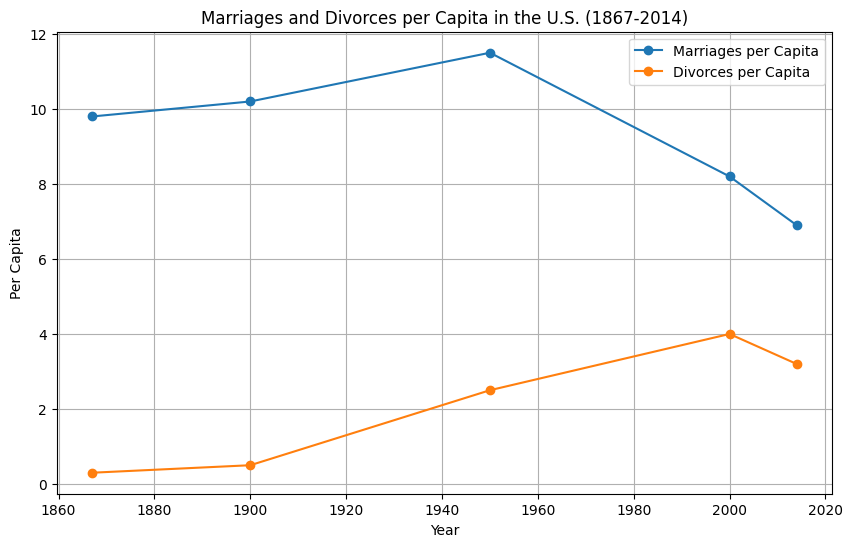

In [20]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(years, marriages, label='Marriages per Capita', marker='o')
plt.plot(years, divorces, label='Divorces per Capita', marker='o')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()

# Display the plot
plt.grid()
plt.show()


#Question 7: Vertical Bar Chart

In [21]:
import matplotlib.pyplot as plt


In [22]:
# Data for the bar chart
years = [1900, 1950, 2000]
marriages = [10.2, 11.5, 8.2]  # Marriages per capita
divorces = [0.5, 2.5, 4.0]     # Divorces per capita


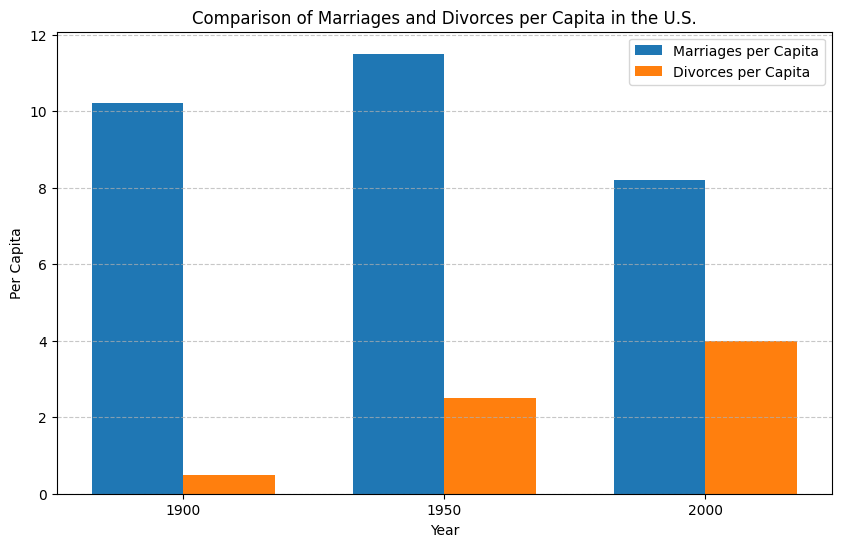

In [23]:
import numpy as np

bar_width = 0.35
positions = np.arange(len(years))

# Plot the bars
plt.figure(figsize=(10, 6))
plt.bar(positions - bar_width / 2, marriages, bar_width, label='Marriages per Capita')
plt.bar(positions + bar_width / 2, divorces, bar_width, label='Divorces per Capita')

#labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Comparison of Marriages and Divorces per Capita in the U.S.')
plt.xticks(positions, years)
plt.legend()

# Display the chart
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Question 8: Horizontal Bar Chart

In [24]:
import matplotlib.pyplot as plt


In [25]:
# Data for the horizontal bar chart
actors = ["Arnold Schwarzenegger", "Sylvester Stallone", "Bruce Willis", "Clint Eastwood", "Tom Cruise"]
kill_counts = [120, 95, 85, 80, 60]


In [26]:
# Data for the horizontal bar chart
actors = ["Arnold Schwarzenegger", "Sylvester Stallone", "Bruce Willis", "Clint Eastwood", "Tom Cruise"]
kill_counts = [120, 95, 85, 80, 60]


In [27]:
# Sort actors and kill counts based on kill counts
sorted_indices = sorted(range(len(kill_counts)), key=lambda x: kill_counts[x], reverse=True)
actors = [actors[i] for i in sorted_indices]
kill_counts = [kill_counts[i] for i in sorted_indices]


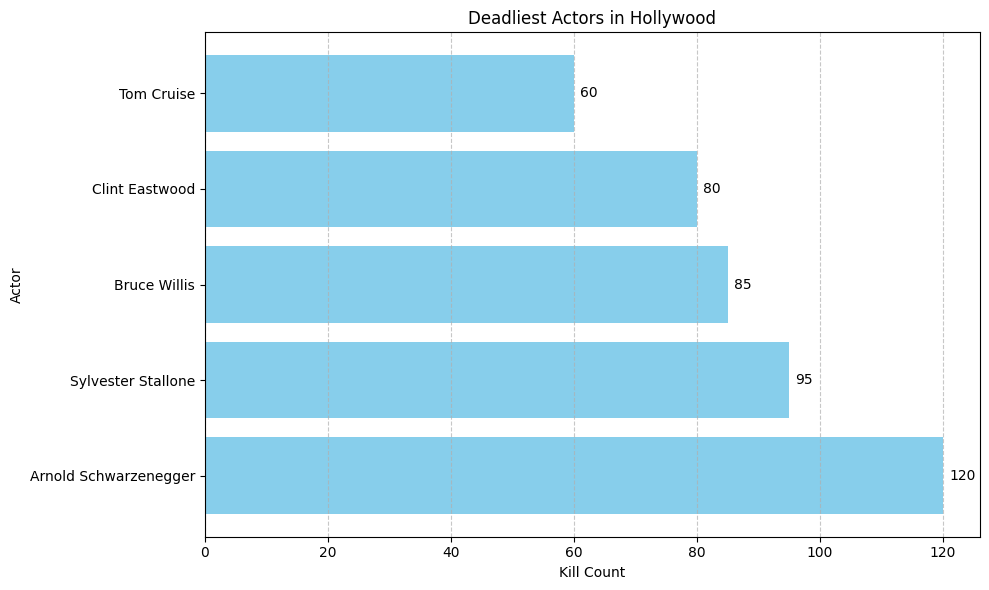

In [28]:
#The horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(actors, kill_counts, color='skyblue')

#labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(kill_counts):
    plt.text(value + 1, index, str(value), va='center')

# Display the chart
plt.tight_layout()
plt.show()


#Question 9: Pie Chart

In [29]:
import matplotlib.pyplot as plt


In [30]:
# Data for the pie chart
labels = ['Assassinated', 'Natural Causes', 'Other']
sizes = [70, 50, 30]  # Number of emperors in each category


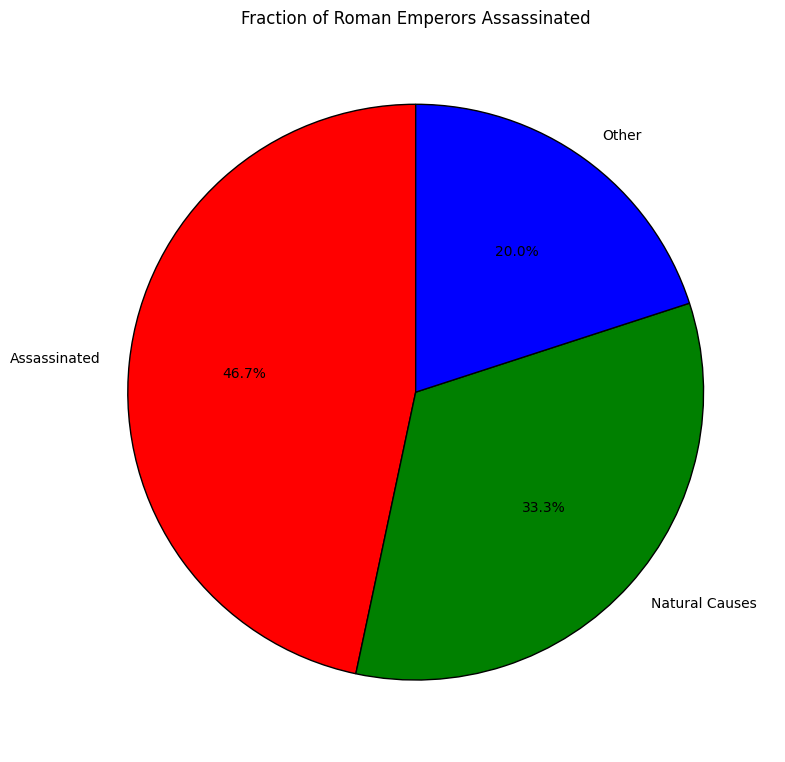

In [31]:
#the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['red', 'green', 'blue'],
    wedgeprops={'edgecolor': 'black'}
)

#title
plt.title('Fraction of Roman Emperors Assassinated')
plt.tight_layout()

# Display the chart
plt.show()


#Question 10: Scatter Plot

In [32]:
import matplotlib.pyplot as plt
import numpy as np


In [33]:
# Data for the scatter plot
years = np.arange(2000, 2010)
arcade_revenue = [1.5, 1.7, 1.6, 1.8, 2.0, 2.1, 2.0, 1.9, 1.8, 1.7]
cs_phds = [200, 210, 220, 230, 250, 270, 260, 240, 230, 220]


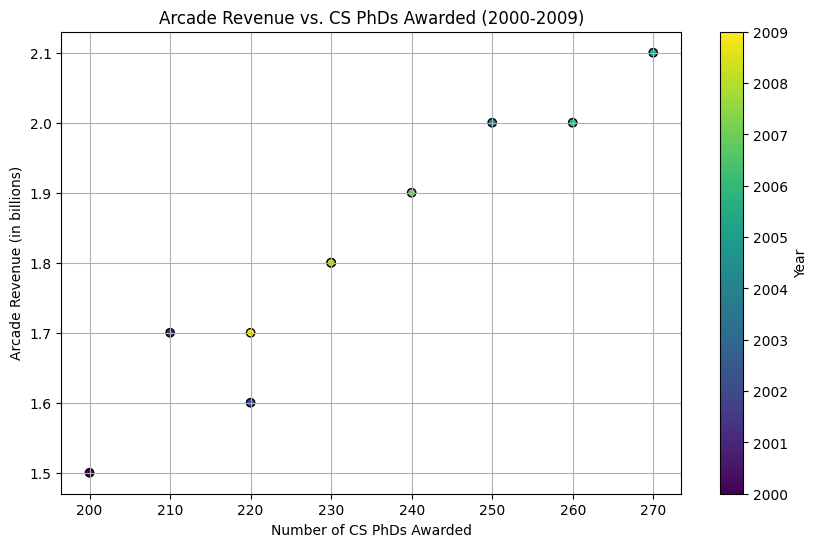

In [34]:
#the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(cs_phds, arcade_revenue, c=years, cmap='viridis', edgecolor='black')

#labels, title, and colorbar
plt.xlabel('Number of CS PhDs Awarded')
plt.ylabel('Arcade Revenue (in billions)')
plt.title('Arcade Revenue vs. CS PhDs Awarded (2000-2009)')
plt.colorbar(scatter, label='Year')

# Display the plot
plt.grid()
plt.show()
